# Progrmas

In [5]:
#bibliotecas
import numpy as np

In [1]:
# integral retangulo a direita


# sendo f minhas função, N o numero de fatias que eu quero (a,b) os limites de integração
def red (f,N,a,b):
    x = np.linspace(a,b,N + 1)
    y = f(x)
    h = np.abs(b - a)/N
    inter = sum(h * y[1:])
    return inter

In [ ]:
# integral de dados importados na forma (x,y)
def inter (dados):
    N = dados.shape[0]
    b =  dados[N - 1,0]
    a =  dados[0,0]
    h = (b - a)/N
    integral = sum(dados[1:N-1,1]*h)
    return integral

In [4]:
# integral regra do trapézio
def trap (f,N,a,b):
    x = np.linspace(a,b,N+1)
    y = f(x)
    h = np.abs(b-a)/N
    integral = f(a)/2 + f(b)/2 
    for i in range (1,N ):
        integral += f(a + i*h)
    return h * integral

In [18]:
# Regra de Simpson
def simpson (f,N,a,b):
    x = np.linspace(a,b,N+1)
    y = f(x)
    h = np.abs(b - a)/N
    par = 0
    impar = 0
    for i in range(1,N,2):
        impar += f(a + i*h)
    for k in range(2,N - 1,2):
        par += f(a + k*h)
    integral = (h/3)*(f(a) + f(b) + 4*impar + 2*par)
    return integral

In [ ]:
# simpson erro
# Regra de Simpson
def simpson (f,N,a,b):
    x = np.linspace(a,b,N+1)
    y = f(x)
    h = np.abs(b - a)/N
    par = 0
    impar = 0
    for i in range(1,N,2):
        impar += f(a + i*h)
    for k in range(2,N - 1,2):
        par += f(a + k*h)
    integral = (h/3)*(f(a) + f(b) + 4*impar + 2*par)
    return integral

In [24]:
# trapézio erro
def trap_erro(f,Ni,trap,a,b,e):
    E = 10
    while E > e:
        E = np.abs( (1/3) * (trap(f,Ni,a,b)- trap(f,2*Ni,a,b)))
        Ni = 2*Ni
    return trap(f,Ni,a,b)



In [25]:
# simpson erro
def simpson_erro(f,Ni,simpson,a,b,e):
    E = 10
    while E > e:
        E = np.abs( (1/15) * (simpson(f,Ni,a,b)- simpson(f,2*Ni,a,b)))
        Ni = 2*Ni
    return simpson(f,Ni,a,b)


In [1]:
def romberg(f, Ni, grau, a, b, trap, e):

    N = grau
    R = np.zeros((N, N), complex)
    R[0][0] = trap(f, Ni, a, b)
    E = R[0][0]

    for i in range(1, N):
        Ni *= 2
        R[i][0] = trap(f, Ni, a, b)
        
        for k in range(1, i+1):  # Ajuste do intervalo do loop interno
            R[i][k] = R[i][k - 1] + (1 / (4 ** k - 1)) * (R[i][k - 1] - R[i - 1][k - 1])
            
        E = np.abs((1 / (4 ** (k + 1) - 1)) * (R[i][k] - R[i - 1][k]))  # Cálculo do erro de truncamento
        
        if E < e:  # Verifica se o erro é menor que o limite
            return R[i][k]


# ---> Romberg <---
def romberg(f, Ni, grau, a, b, integral, e): # método de Romber com truncamento em um determinado erro

    N = grau # grau máximo da matriz de romberg
    R = np.zeros((N, N), complex)
    R[0][0] = integral(f, Ni, a, b)
    E = R[0][0]

    for i in range(1, N):
        Ni *= 2
        R[i][0] = integral(f, Ni, a, b)
        
        for k in range(1, i+1):  # Ajuste do intervalo do loop interno
            R[i][k] = R[i][k - 1] + (1 / (4 ** k - 1)) * (R[i][k - 1] - R[i - 1][k - 1])
            
        E = np.abs((1 / (4 ** (k + 1) - 1)) * (R[i][k] - R[i - 1][k]))  # Cálculo do erro de truncamento
        
        if E < e:  # Verifica se o erro é menor que o limite
            return R


In [75]:
# Método de gauss
from gaussxw import gaussxw , gaussxwab

def f(x):
    y = 2*x**3 + 2*x**2
    return y
N = 2
a = 2
b = 100


x,w = gaussxwab(N,a,b) # me permite até o grau 2N - 1
s = 0.0
for i in range (N):
    s += f(x[i])*w[i]

x1,w1 = gaussxw(N)
xp = 0.5*(b-a)*x1 + 0.5*(b+a)
wp = 0.5*(b-a)*w1

s1 = 0.0
for k in range(N):
    s1 += w[k]*f(x[k])



print(trap(f,10,a,b),s,s1)

51149798.56 50666653.33333345 50666653.33333345


In [1]:
# ---> Gauss-Chebyshev <---
def gauss_che(f,a,b,nc):
    xc, wc = roots_chebyt(nc)
    xpc = 0.5 * (b - a) * xc + 0.5 * (b + a)
    wpc = 0.5 * (b - a) * wc

    # Calculando a integral usando a regra de Gauss-Chebyshev
    sc = np.sum(f(xpc) * wpc)
    return sc

# ---> Gauss-Chebyshev <---
def gauss_che(a,b,nc):
    xc, wc = roots_chebyt(nc)
    xpc = 0.5 * (b - a) * xc + 0.5 * (b + a)
    wpc = 0.5 * (b - a) * wc

    # Calculando a integral usando a regra de Gauss-Chebyshev
    sc = np.sum(integranda(xpc) * wpc)
    return sc
 

def gauss_che(f, a, b, nc): #vec
    xc, wc = sp.roots_chebyt(nc)
    xc = xc[:, np.newaxis]  # Adiciona uma nova dimensão para torná-lo uma coluna
    wc = wc[:, np.newaxis]  # Adiciona uma nova dimensão para torná-lo uma coluna

    xpc = 0.5 * (b - a) * xc + 0.5 * (b + a)
    wpc = 0.5 * (b - a) * wc

    # Calculando a integral usando a regra de Gauss-Chebyshev
    sc = np.sum(f(xpc) * wpc, axis=0)  # Somando ao longo do eixo das colunas
    return sc

In [ ]:

# ---> Trapézio em duasvariáveis mas com uma fixa <---
def trap2 (f,N,a,b,y_valor): # Essa função é uma adapatação do método do trapézio para que eu possa criar um array 
                             # com o valor integral em diversos pontos
    x = np.linspace(a,b,N+1)
    y = f(x,y_valor)
    h = np.abs(b-a)/N
    integral = f(a,y_valor)/2 + f(b,y_valor)/2
    
    for i in range (1,N ):
        integral += f(a + i*h,y_valor)
    return h * integral


# Sistemas de equações

In [2]:
# Gaussian elimination

def Gaussian_elimintation(A,v):
    N = len(v)
    for m in range(N):

        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]

    # Backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
    return x

In [ ]:
#Pivotagem parcial

def Gaussian_elimintation_pivo_p(A,v):
    Am = A.copy()
    vm = v.copy()
    N = len(v)
    A_lines = np.arange(0,N,1)
    
    for m in range(N):
            
        # Calculando o maior elemento
        maior = Am[A_lines[m],A_lines[m]]
        maior_indice = A_lines[m]
        for k in A_lines[m : N  : 1]:
            count = np.abs(Am[k,m])
            if count > maior:
                maior = count
                maior_indice = k
                
                    
        # Troquei a ordem no meu vetor de leitura
        posicao = np.where(A_lines == maior_indice)
        m_tempo = A_lines[m]
        A_lines[posicao] = m_tempo
        A_lines[m] = maior_indice


  
        # Divide by the diagonal element
        div = Am[A_lines[m],m]
        Am[A_lines[m],:] /= div
        vm[A_lines[m]] /= div
    
        
        # Now subtract from the lower rows
        for i in A_lines[m + 1: N  :1]:
            mult = Am[i,m]
            Am[i,:] -= mult*Am[A_lines[m],:]
            vm[i] -= mult*vm[A_lines[m]]



    # Backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = vm[A_lines[m]]
        for i in range(m+1,N):
            x[m] -= Am[A_lines[m],i]*x[i]

    print(Am[A_lines,:])
    return x


In [1]:
# pivotagem total
def Gaussian_elimintation_pivo_total(A,v):
    Am = A.copy()
    vm = v.copy()
    N = len(v)
    A_lines = np.arange(0,N,1)
    A_coluns = np.arange(0,N,1)
    
    for m in range(N):

                
        # Calculando o maior elemento coluna
        maior_coluna = Am[A_lines[m],A_coluns[m]]
        maior_indice_coluna = A_coluns[m]
        for k1 in A_coluns[m : N  : 1]:
            count_coluna = np.abs(Am[A_lines[m],k1])
            if count_coluna > maior_coluna:
                maior_coluna = count_coluna
                maior_indice_coluna = k1
                
                    
        # Troquei a ordem no meu vetor de leitura coluna
        posicao_coluna = np.where(A_coluns == maior_indice_coluna)
        m_tempo_coluna = A_coluns[m]
        A_coluns[posicao_coluna] = m_tempo_coluna
        A_coluns[m] = maior_indice_coluna
        


        
        # Calculando o maior elemento linha
        maior = Am[A_lines[m],A_coluns[m]]
        maior_indice = A_lines[m]
        for k in A_lines[m : N  : 1]:
            count = np.abs(Am[k,A_coluns[m]])
            if count > maior:
                maior = count
                maior_indice = k
                
                    
        # Troquei a ordem no meu vetor de leitura linha
        posicao = np.where(A_lines == maior_indice)
        m_tempo = A_lines[m]
        A_lines[posicao] = m_tempo
        A_lines[m] = maior_indice




    
        # Divide by the diagonal element
        div = Am[A_lines[m],A_coluns[m]]
        Am[A_lines[m],:] /= div
        vm[A_lines[m]] /= div
    
        
        # Now subtract from the lower rows
        for i in A_lines[m + 1: N  :1]:
            mult = Am[i,A_coluns[m]]
            Am[i,:] -= mult*Am[A_lines[m],:]
            vm[i] -= mult*vm[A_lines[m]]



    # Backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[A_coluns[m]] = vm[A_lines[m]]
        for i in range(m+1,N):
            x[A_coluns[m]] -= Am[A_lines[m],A_coluns[i]]*x[A_coluns[i]]

    print(Am[:,A_coluns])
    return x

In [ ]:
# Gauss complexo
def Gaussian_elimintation_pivo_total(A, v):
    Am = A.copy()
    vm = v.copy()
    N = len(v)
    A_lines = np.arange(0, N, 1)
    A_columns = np.arange(0, N, 1)
    
    for m in range(N):
                
        # Calculando o maior elemento na coluna
        maior_coluna = np.abs(Am[A_lines[m], A_columns[m]])
        maior_indice_coluna = A_columns[m]
        for k1 in A_columns[m : N : 1]:
            count_coluna = np.abs(Am[A_lines[m], k1])
            if count_coluna > maior_coluna:
                maior_coluna = count_coluna
                maior_indice_coluna = k1
                
        # Trocando a ordem no vetor de leitura de colunas
        posicao_coluna = np.where(A_columns == maior_indice_coluna)
        m_tempo_coluna = A_columns[m]
        A_columns[posicao_coluna] = m_tempo_coluna
        A_columns[m] = maior_indice_coluna
        
        # Calculando o maior elemento na linha
        maior = np.abs(Am[A_lines[m], A_columns[m]])
        maior_indice = A_lines[m]
        for k in A_lines[m : N : 1]:
            count = np.abs(Am[k, A_columns[m]])
            if count > maior:
                maior = count
                maior_indice = k
                
        # Trocando a ordem no vetor de leitura de linhas
        posicao = np.where(A_lines == maior_indice)
        m_tempo = A_lines[m]
        A_lines[posicao] = m_tempo
        A_lines[m] = maior_indice
    
        # Dividindo pelo elemento diagonal
        div = Am[A_lines[m], A_columns[m]]
        Am[A_lines[m], :] /= div
        vm[A_lines[m]] /= div
    
        # Subtraindo das linhas inferiores
        for i in A_lines[m + 1: N : 1]:
            mult = Am[i, A_columns[m]]
            Am[i, :] -= mult * Am[A_lines[m], :]
            vm[i] -= mult * vm[A_lines[m]]
    
    # Substituição retroativa
    x = np.empty(N, complex)
    for m in range(N - 1, -1, -1):
        x[A_columns[m]] = vm[A_lines[m]]
        for i in range(m + 1, N):
            x[A_columns[m]] -= Am[A_lines[m], A_columns[i]] * x[A_columns[i]]

    print(Am[:, A_columns])
    return x

In [ ]:
# decomposição LU
def LU(A):
    U = A
    N = U[:,0]
    N = len(N)
    L = np.zeros([N,N],float)
    for m in range(N):
        for p in range(N):
            if p >= m:    
                L[p,m] = U[p,m]
        # Divide by the diagonal element
        div = U[m,m]
        U[m,:] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = U[i,m]
            U[i,:] -= mult*U[m,:]

    
    return L , U

In [ ]:
# solução LU
def solucao_LU(L,U,v):
    N = len(v)
    y = np.empty(N,float)
    for n in range(N):
        y[n] = v[n]/L[n,n]
        for j in range(n):
            y[n] -= L[n,j]*y[j]/L[n,n]
        # Backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for i in range(m+1,N):
            x[m] -= U[m,i]*x[i]
    return x


In [ ]:
# resolver superior e inferiro 
def solveLowerTriangular(L,b):
  n = len(b)
  y = np.array(n)
  
  for i in list(range(1,n+1,1)):
    s = 0
    for j in list(range(1,i,1)):
      s = s + L[i-1][j-1]*y[j-1]

    y[i-1] = b[i-1] - s

  return y


# Resolve o sistema triangular superior.
def solveUpperTriangular(U,b):
  n = len(b)
  x = np.array(n)
  x[n-1] = b[n-1]/U[n-1][n-1]

  for i in list(range(n-1,0,-1)):
    s = 0
    for j in list(range(i+1,n+1,1)):
      s = s + U[i-1][j-1]*x[j-1]

    x[i-1] = (b[i-1]-s)/(U[i-1][i-1])

  return x

In [ ]:
# decomposição LU com pivotagem parcial
def lu_pivo(A):

    n = A.shape[0]
    piv = np.arange(0,n)
    for k in range(n-1):

        # piv
        max_row_index = np.argmax(abs(A[piv[k:n],k])) + k
        piv[[k,max_row_index]] = piv[[max_row_index,k]]
        

        # LU 
        for i in piv[k+1:n]:          
            A[i,k] = A[i,k]/A[piv[k],k]      
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[piv[k],j] 

    return A,piv

In [ ]:
#solução LU com pivotagem
def resolver_LU(A,v,piv):
  n = len(v)
  y = np.zeros(n)
  
  for i in list(range(1,n+1,1)):
    s = 0
    for j in list(range(1,i,1)):
      s = s + A[piv[i-1],j-1]*y[piv[j-1]]

    y[piv[i-1]] = v[piv[i-1]] - s

  x = np.zeros(n)
  x[piv[n-1]] = y[piv[n-1]]/A[piv[n-1],n-1]

  for i in list(range(n-1,0,-1)):
    s = 0
    for j in list(range(i+1,n+1,1)):
      s = s + A[piv[i-1],j-1]*x[piv[j-1]]

    x[piv[i-1]] = (y[piv[i-1]]-s)/(A[piv[i-1],i-1])
    
  return x[piv]
    

In [1]:
def gauss_jordan(matriz):
    n = len(matriz)
    matriz_aumentada = np.hstack([matriz, np.identity(n)])
    
    for i in range(n):
        # Pivoteamento parcial
        max_index = np.argmax(np.abs(matriz_aumentada[i:, i])) + i
        matriz_aumentada[[i, max_index]] = matriz_aumentada[[max_index, i]]
        
        # Fazendo o pivô ser 1
        matriz_aumentada[i] /= matriz_aumentada[i, i]
        
        # Zerando as entradas abaixo e acima do pivô
        for j in range(n):
            if i != j:
                matriz_aumentada[j] -= matriz_aumentada[j, i] * matriz_aumentada[i]
                
    return matriz_aumentada[:, n:]

In [ ]:
# Decomposição QR , householder
def QR_house(A):

    # Função temporária
    def householder(x):
        alpha = x[0]

        # Calcula a norma excluido o segundo elemento 
        s = np.power(np.linalg.norm(x[1:]), 2)
        v = x.copy()

        if s == 0:
            tau = 0
        else:
            t = np.sqrt(alpha**2 + s)
            v[0] = alpha - t if alpha <= 0 else -s / (alpha + t)
            tau = 2 * v[0]**2 / (s + v[0]**2)
            v /= v[0]

        return v, tau

    
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)

    for j in range(min(m, n)):
        v, tau = householder(R[j:, j])
        H = np.identity(m)
        H[j:, j:] -= tau * np.outer(v, v)
        R = H @ R
        Q = H @ Q

    return Q.T, R




In [ ]:
# Resolver QR
def resolver_QR_house(Q,R,v):
    
    y = Q.T@ v

    n = len(y)
    x = np.zeros(n)
    x[n-1] = y[n-1]/R[n-1][n-1]

    for i in list(range(n-1,0,-1)):
        s = 0
        for j in list(range(i+1,n+1,1)):
            s = s + R[i-1][j-1]*x[j-1]

        x[i-1] = (y[i-1]-s)/(R[i-1][i-1])
    return x



In [ ]:
# Matriz de banda 
N = 10
k = 1
alpha = 21
C = 10

A = np.empty([3,N] ,float)
A[0, :] = -k
A[1, :] = alpha
A[2, :] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k
v = np.zeros(N,float)
v[0] = C
v,A
def banded(A,v,up,down):

    
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor, seleciona o elemento da diagonal principal
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

banded(A,v,1,1)


In [ ]:
# Gauss seigal
def QR (A):

    def achar_u (a,q,ordem):
        N = len(a)
        u = np.zeros(N,float)
        som = np.zeros(N,float)
        multi = 0
        for i in range ( ordem + 1):
            multi = np.dot(q[:,i],a)
            som += multi * q[:,i]
        u = a - som
        return u
        
    # Criando as matrizes
    N = len(A)
    R = np.zeros([N,N],float)
    q = np.zeros([N,N],float)
    a_conta = np.zeros([N,N],float)
    a = A.T
    # Fazendo o primeiro caso
    u = A[:,0]

    for i in range(N):

        
        norm_u = np.linalg.norm(u)
        
        q[:,i] = u / norm_u

    
        for j in range (i + 1 , N):
            R[ i , j ] = np.dot(a[j, :] , q[:,i])  
        
        R[i,i] = norm_u
        if i < (N - 1):
            u = achar_u( A[ : ,i + 1 ] , q , i)
        q1 = u / norm_u
    return q,R


In [1]:
def autovalores(A, QR, err=1e-3):# Calcula os autovalores da matriz A  usando o método QR iterativo.
    A = A.copy()
    N = len(A[0])
    V = np.eye(N)
    Q, R = QR(A)
    cont = 0

    while True:
        A = R @ Q
        V = V @ Q
        menor = np.abs(A) < err
        np.fill_diagonal(menor, True)
        if menor.all() or cont >= 1000:
            break
        Q, R = QR(A)
        cont += 1

    return np.diag(A)

In [ ]:
# Relaxação
def relax (f,xi,erro):
    x = np.zeros([100])
    x[0] = xi
    err = xi
    i = 1
    while(err > erro):
        x[i] = f(x[i - 1])
        print("x = ",x[i])
        if(i >= 3):
            err = (x[i - 1]-x[i])**2/(2*x[i - 1] - x[i - 1] - x[i])
        i += 1
    return x[i - 1]


In [1]:
# relaxação mais de uma função
def relax_2v (fx,fy,xi,yi,erro):
    x = np.zeros([100])
    y = np.zeros([100])
    x[0] = xi
    y[0] = yi
    i = 1
    while(i < 100):
        y[i] = fy(1,2,x[i - 1],y[i - 1])
        x[i] = fx(1,2,x[i - 1],y[i-1])
        print(i,": x = " ,x[i], " y = ", y[i])
        i += 1
        if(np.abs(x[i - 1] - x[i - 2]) < erro):
            break
    return x[i - 1],y[i - 1]


In [ ]:
#bissec
# já escolher x1 e x2 de sinais opostos
def bissec (f,x1,x2,err):
    N = np.ceil(np.log2((x2 - x1)/err)) # definindo numero de passos
    N = int(N)
    print("Número de passos = ",N)

    xtemp = 0
    for i in range (N):
        xtemp = 1/2 * (x2 + x1)
        if f(xtemp)*f(x1) > 0:
            x1 = xtemp
        else:
            x2 = xtemp
    return xtemp

In [ ]:
#  Newton_Raphson
def Newton_Raphson(f, f_, xi, err):
    while True:
        xtemp = xi
        xi = xi - f(xi)/f_(xi)
        if np.abs(xi - xtemp) < err:
            break
    return xi

In [ ]:
def secante (f,x1,x2,err):
    xtemp = 0
    while True:
        xtemp = x2 - f(x2)*((x2-x1)/(f(x2) - f(x1)))
        if np.abs(xtemp - x2) < err:
            break
        x1 = x2
        x2 = xtemp
    return xtemp

In [ ]:
# Define a função que calcula a matriz jacobiana
def J(v1, v2):
    df1v1 = 1/R1 + 1/R2 + I0*(np.exp((v1 - v2)/VT)*(1/VT))
    df1v2 = I0*(np.exp((v1 - v2)/VT)*(-1/VT))
    df2v1 = I0*(np.exp((v1 - v2)/VT)*(1/VT))
    df2v2 = -1/R4 - 1/R3 + I0*(np.exp((v1 - v2)/VT)*(-1/VT))
    return np.array([[df1v1, df1v2], [df2v1, df2v2]])

def Newton_Raphson_mais(f, J, xi, err):
    while True:
        J_xi = J(xi[0], xi[1])
        xtemp = np.linalg.solve(J_xi, f(xi[0], xi[1]))
        xi =xi -  xtemp
        if np.linalg.norm(xtemp) < err:
            break
    return xi

In [ ]:
# secção áurea
import numpy as np
def aurea (f,x1,x4,err):

    # razão aurea
    z = (1+ np.sqrt(5))/2

    #pontos
    x2 = x4 - (x4 - x1)/z
    x3 = x1 + (x4 - x1)/z
    
    # f(pontos)
    
    f1 = f(x1)
    f2 = f(x2)
    f3 = f(x3)
    f4 = f(x4)
    
    while np.abs(x4 - x1) > err:
        if f2 < f3:
            
            x4,f4 = x3,f3
            x3,f3 = x2,f2
            x2 = x4 - (x4 - x1)/z
            f2 = f(x2)
        else :
            
            x1,f1 = x2,f2
            x2,f2 = x3,f3
            x3 = x1 - (x4 - x1)/z
            f3 = f(x3)      
    return (x4 + x1)/2

# Transformadas de Fourrier

In [4]:
# dfr para função real de uma variável

# y são os pontos na minha função
def dft(y):
    N = len(y)
    c = np.zeros(N//2 + 1,complex)
    for k in range(N//2 + 1):
        for n in range(N):
            c[k] += y[n]+np.exp(-2j*np.pi*k*n/N)
    return c # c um array com os coefs

#inversa da dft
def inv_dft(c):
    N = len(c)
    y = np.zeros(N//2 + 1,complex)
    for n in range(N//2 + 1):
        for k in range(N):
            y[n] += c[n]+np.exp((np.pi*k*n/N)*1j)
    return (1/N)*y # c um array com os coefs


In [7]:
# mais de uma dimensão

def dft_2d (ymn):
    N = len(ymn[:,0])
    M = len(ymn[0,:])
    c = np.zeros([M,N//2 + 1],complex)
    for k in range(M):
        for l in range(N//2 + 1):
            for m in range(M):
                for n in range(N):
                    c[k,l] += y[m,n]+np.exp(-2j*np.pi*((k*m/M) + (l*n/N)))    
    return c

def inv_dft_2d (ckl):
    N = len(ckl[:,0])
    M = len(ckl[0,:])
    y = np.zeros([M,N//2 + 1],complex)
    for m in range(M):
        for n in range(N//2 + 1):
            for k in range(M):
                for l in range(N):
                    y[k,l] += c[k,l]+np.exp(-2j*np.pi*((k*m/M) + (l*n/N)))
    return y*(1/(M*N))

In [7]:
import numpy as np

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    elif N % 2 != 0:
        raise ValueError("escolher x como potencia de 2")


    X_even = fft(x[::2])

    X_odd = fft(x[1::2])

    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    X = np.zeros(N, dtype=complex)
    half_N = N // 2
    X[:half_N] = X_even + factor[:half_N] * X_odd
    X[half_N:] = X_even + factor[half_N:] * X_odd

    return X


def ifft(X):
    N = len(X)
    if N <= 1:
        return X
    elif N % 2 != 0:
        raise ValueError("escolher x como potencia de 2")


    x_even = ifft(X[::2])

    x_odd = ifft(X[1::2])


    factor = np.exp(2j * np.pi * np.arange(N) / N)
    x = np.zeros(N, dtype=complex)
    half_N = N // 2
    x[:half_N] = x_even + factor[:half_N] * x_odd
    x[half_N:] = x_even + factor[half_N:] * x_odd

    return x / N

#frequencias = np.arange(N)*(2*np.pi/N)

In [ ]:
def onda_quadrada(x, amplitude, periodo):
    onda = amplitude * np.sign(np.sin(2*np.pi*x/periodo))
    return onda
    

# Rungue-kutta

In [7]:
# 4 ordem 1 variável
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)
# escrever a função na forma dx/dt = f(x,t), ai a soluçao do primeiro grau
# x(t) = x(t) +hf(x,t)
a = 0.0 # inicio do intervalor 
b = 10.0 # final do intervalo
N = 10 # numero de intervalos
h = (b-a)/N # tamanho do intervalo
tpoints = arange(a,b,h) # pontos do intervalo
xpoints = []
x = 0.0 # valor inicial de x
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6


In [11]:
def rk4(a,b,N,x_0,f):
    h = (b-a)/N
    tpoints = np.linspace(a + 1e-16,b,N) 
    xpoints = np.zeros(N)
    x = x_0 
    for i,t in enumerate(tpoints):
        xpoints[i] = x
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
    return xpoints

In [ ]:
def rk4_2d(a,b,N,r_0,f):
    h = (b-a)/N
    tpoints = np.linspace(a + 1e-16,b,N) 
    xpoints = np.zeros(N)
    ypoints = np.zeros(N)
    r = r_0
    for i,t in enumerate(tpoints):
        xpoints[i] = r[0]
        ypoints[i] = r[1]
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return [xpoints,ypoints]


# com erro
def rk4_2d(a,b,N,r_0,f):
    h = (b-a)/N
    tpoints = np.linspace(a + 1e-16,b,N) 
    xpoints = np.zeros(N)
    ypoints = np.zeros(N)
    r = r_0
    err = np.zeros(N)
    anterior = 0
    for i,t in enumerate(tpoints):
        anterior = xpoints[i]
        xpoints[i] = r[0]
        ypoints[i] = r[1]
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        erro = np.abs((xpoints[i] - anterior))
        if i > 0:
            err[i] = err[i-1] + np.abs(xpoints[i] - xpoints[i-1])

    return [xpoints,ypoints,err]


In [14]:
def rk4_3d(a,b,N,r_0,f):
    h = (b-a)/N
    tpoints = np.linspace(a + 1e-16,b,N) 
    xpoints = np.zeros(N)
    ypoints = np.zeros(N)
    zpoints = np.zeros(N)
    r = r_0
    for i,t in enumerate(tpoints):
        xpoints[i] = r[0]
        ypoints[i] = r[1]
        zpoints[i] = r[2]
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return [xpoints,ypoints,zpoints]


a = 0
b_f = 50
N = 10000
t = np.linspace(0,50,N)
r_0 = (0,1,0)

r = rk4_3d(a,b_f,N,r_0,f)
x = r[0]
y = r[1]
z = r[2]

In [5]:
# Método Runge-Kutta de quarta ordem
def rk4_4d(a, b, N, r0, f):
    h = (b - a) / N
    t = np.linspace(a, b, N)
    r = np.zeros((4, N))
    r[:, 0] = r0
    
    for i in range(1, N):
        k1 = h * f(r[:, i-1], t[i-1])
        k2 = h * f(r[:, i-1] + 0.5 * k1, t[i-1] + 0.5 * h)
        k3 = h * f(r[:, i-1] + 0.5 * k2, t[i-1] + 0.5 * h)
        k4 = h * f(r[:, i-1] + k3, t[i-1] + h)
        
        r[:, i] = r[:, i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return r

# Relaxação para edps

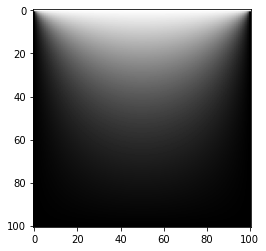

In [3]:
import numpy as np
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy
def laplace(M,V,target):
    # Create arrays to hold potential values
    phi  = np.zeros([M+1,M+1],float)
    # Condições de fronteira
    phi[0,:] = V
    phiprime = np.empty([M+1,M+1],float)

    # Main loop
    delta = 1.0
    while delta>target:

        # Calculate new values of the potential
        for i in range(M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M:
                    phiprime[i,j] = phi[i,j]
                else:
                    phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4

        # Calculate maximum difference from old values
        delta = np.max(abs(phi-phiprime))

        # Swap the two arrays around
        phi,phiprime = phiprime,phi
    return phi

phi = laplace(M,V,target)
imshow(phi)
gray()
show()

In [ ]:
def Poisson(M,V,p,target):
    # Create arrays to hold potential values
    phi  = np.zeros([M+1,M+1],float)
    # Condições de fronteira
    phi[0,:] = V
    phiprime = np.empty([M+1,M+1],float)

    # Main loop
    delta = 1.0
    while delta>target:

        # Calculate new values of the potential
        for i in range(M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M:
                    phiprime[i,j] = phi[i,j]
                elif i >= 20 and i <= 40 and j >= 60 and j <= 80:
                    phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 + (delta**2)*p/4
                elif j >= 20 and j <= 40 and i >= 60 and i <= 80:
                    phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - (delta**2)*p/4
                else:
                    phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4

        # Calculate maximum difference from old values
        delta = np.max(abs(phi-phiprime))

        # Swap the two arrays around
        phi,phiprime = phiprime,phi
    return phi

In [4]:
def gauss_seidel(M, V, w, target):
    # Cria matrizes para armazenar os valores do potencial
    phi = np.zeros([M+1, M+1], float)
    # Condições de fronteira
    phi[0, :] = V
    
    # Loop principal
    delta = 1.0
    while delta > target:
        delta = 0.0  

        # Calcula novos valores do potencial
        for i in range(1, M):
            for j in range(1, M):
                c = phi[i, j]
                phi[i, j] = (1 - w) * phi[i, j] + (w / 4) * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])

                # Calcula a diferença em relação ao valor antigo
                diff = abs(phi[i, j] - c)
                if diff > delta:
                    delta = diff
    
    return phi

# Exameplo de classe

In [2]:
import numpy as np
def trap (f,N,a,b):
    x = np.linspace(a,b,N+1)
    y = f(x)
    h = np.abs(b-a)/N
    integral = f(a)/2 + f(b)/2 
    for i in range (1,N ):
        integral += f(a + i*h)
    return h * integral

def f1(x, m, n, a, L):
    v0 = np.sqrt(((x/a)-6)**4 + (13/110)*((x/a) - 6)**5)
    func = np.sin(np.pi*m*x/L) * v0 * np.sin(np.pi*n*x/L)
    return func


a = 1
L = 10
a_init = 0
b = L
N = 1000

def QR (A):

    def achar_u (a,q,ordem):
        N = len(a)
        u = np.zeros(N,float)
        som = np.zeros(N,float)
        multi = 0
        for i in range ( ordem + 1):
            multi = np.dot(q[:,i],a)
            som += multi * q[:,i]
        u = a - som
        return u
        
    # Criando as matrizes
    N = len(A)
    R = np.zeros([N,N],float)
    q = np.zeros([N,N],float)
    a_conta = np.zeros([N,N],float)
    a = A.T
    # Fazendo o primeiro caso
    u = A[:,0]

    for i in range(N):

        
        norm_u = np.linalg.norm(u)
        
        q[:,i] = u / norm_u

    
        for j in range (i + 1 , N):
            R[ i , j ] = np.dot(a[j, :] , q[:,i])  
        
        R[i,i] = norm_u
        if i < (N - 1):
            u = achar_u( A[ : ,i + 1 ] , q , i)
        q1 = u / norm_u
    return q,R

def autovalores(A, QR, err=1e-3):# Calcula os autovalores da matriz A  usando o método QR iterativo.
    A = A.copy()
    N = len(A[0])
    V = np.eye(N)
    Q, R = QR(A)
    cont = 0

    while True:
        A = R @ Q
        V = V @ Q
        menor = np.abs(A) < err
        np.fill_diagonal(menor, True)
        if menor.all() or cont >= 1000:
            break
        Q, R = QR(A)
        cont += 1

    return np.diag(A)

class Hmn:
    def __init__(self,M):
        
        self.M = M
        self.L = L
        self.a = a
        self.H = np.zeros((M, M), float)
        a_init = 0
        b = L
        N = 1000
        
        for m in range(1,M + 1):
 
            for n in range(1,M + 1):
                if m-1 == n-1  :
                    self.H[m-1,n-1] =  trap (lambda x: f1(x,m,n,a,L),N,a_init,b)*L/2 + ((np.pi * n)**2)/L
                else:
                     self.H[m-1,n-1] =  trap (lambda x: f1(x,m,n,a,L),N,a_init,b)*L/2

    def auto (self):   
        return autovalores(self.H,QR)
    

             

# simulação de trajetória

In [7]:
def f(r,t):
    m = 1
    g = 9.82
    const = 0.4
    rx,vx,ry,vy = r
    v = np.sqrt(vx**2 + vy**2)
    frx = vx
    fvx = - const*v*vx/m
    
    fry = vy
    fvy = -g - const*v*vy/m
    return np.array([frx,fvx,fry,fvy],float)

L = 10
a = 0
b_f = 100
N = 10000
t = np.linspace(0,50,N)
v0 = 10

r_0 = (0,v0*np.sin(np.pi/6),1,v0*np.sin(np.pi/6))

r = rk4_4d(a,b,N,r_0,f)
x = r[0]
y = r[2]


    # Parar a simulação quando o corpo atingir o solo ou a parede
mask = (y >= 0) & (x <= L) 
x = x[mask]
y = y[mask]
#plt.plot(x,y)